In [54]:
from utils import fetch_dataset
from grakel.kernels import GraphletSampling

In [55]:
MUTAG = fetch_dataset("MUTAG", verbose=False)
GS = GraphletSampling(k=5)

In [56]:
GS.fit_transform(MUTAG.data)

array([[2880., 1632., 1944., ..., 1248., 4392., 2616.],
       [1632.,  932., 1104., ...,  712., 2490., 1486.],
       [1944., 1104., 1313., ...,  844., 2965., 1767.],
       ...,
       [1248.,  712.,  844., ...,  548., 1904., 1140.],
       [4392., 2490., 2965., ..., 1904., 6698., 3990.],
       [2616., 1486., 1767., ..., 1140., 3990., 2382.]])

In [57]:
GS._graph_bins

{0: <grakel.kernels._isomorphism.bliss.Graph at 0x134c20fd0>,
 1: <grakel.kernels._isomorphism.bliss.Graph at 0x134b75850>,
 2: <grakel.kernels._isomorphism.bliss.Graph at 0x134b645e0>,
 3: <grakel.kernels._isomorphism.bliss.Graph at 0x134c86a30>}

In [121]:
import networkx as nx
k = 4
four_node_graphs = [g for g in nx.graph_atlas_g() if len(g.nodes())==k] # and len(list(nx.connected_components(g)))==1
print(len(four_node_graphs))

11


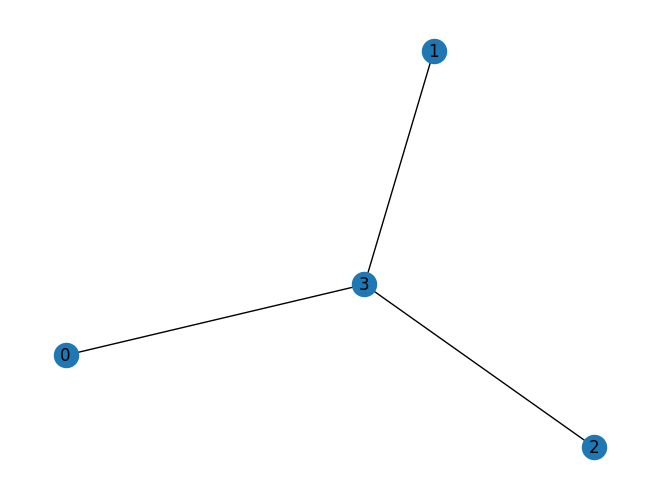

In [122]:
index = 5
# pos = nx.nx_agraph.graphviz_layout(four_node_graphs[index], prog="neato")
nx.draw(four_node_graphs[index], with_labels=True)

In [146]:
G1 = nx.Graph()
G1.add_node(0, label=0)
G1.add_node(1, label=0)
G1.add_node(2, label=0)
G1.add_node(3, label=0)
G1.add_node(4, label=1)
G1.add_node(5, label=1)
G1.add_node(6, label=1)
G1.add_edges_from([
     (0,3),
     (1,3),
     (2,3),
     (3,4),
     (4,5),
     (4,6)])

G2 = nx.Graph()
G2.add_node(7, label=0)
G2.add_node(8, label=0)
G2.add_node(9, label=0)
G2.add_node(10, label=0)
G2.add_node(11, label=1)
G2.add_node(12, label=1)
G2.add_node(13, label=1)
G2.add_edges_from([
     (7,10),
     (8,10),
     (9,10),
     (10,11),
     (11,12),
     (11,13),
     (7,12),
     (9,13)])

In [128]:
from itertools import combinations

features = []
k = 4
C = combinations(list(G2.nodes()), 4)
for c in C:
    for i in range(len(four_node_graphs)):
        if nx.is_isomorphic(G2.subgraph(c), four_node_graphs[i]):
            print(c, i)
            features.append(i)

set(features)


(7, 8, 9, 10) 5
(7, 8, 9, 11) 0
(7, 8, 9, 12) 1
(7, 8, 9, 13) 1
(7, 8, 10, 11) 5
(7, 8, 10, 12) 6
(7, 8, 10, 13) 2
(7, 8, 11, 12) 2
(7, 8, 11, 13) 1
(7, 8, 12, 13) 1
(7, 9, 10, 11) 5
(7, 9, 10, 12) 6
(7, 9, 10, 13) 6
(7, 9, 11, 12) 2
(7, 9, 11, 13) 2
(7, 9, 12, 13) 3
(7, 10, 11, 12) 8
(7, 10, 11, 13) 6
(7, 10, 12, 13) 2
(7, 11, 12, 13) 6
(8, 9, 10, 11) 5
(8, 9, 10, 12) 2
(8, 9, 10, 13) 6
(8, 9, 11, 12) 1
(8, 9, 11, 13) 2
(8, 9, 12, 13) 1
(8, 10, 11, 12) 6
(8, 10, 11, 13) 6
(8, 10, 12, 13) 1
(8, 11, 12, 13) 2
(9, 10, 11, 12) 6
(9, 10, 11, 13) 8
(9, 10, 12, 13) 2
(9, 11, 12, 13) 6
(10, 11, 12, 13) 5


{0, 1, 2, 3, 5, 6, 8}

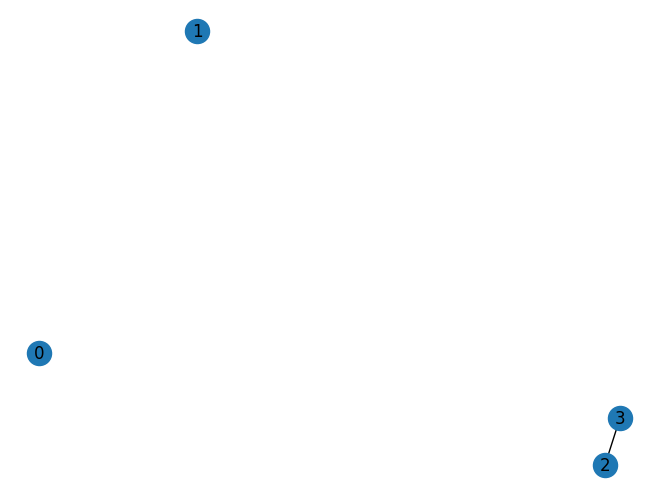

In [145]:
nx.draw(four_node_graphs[1], with_labels=True)

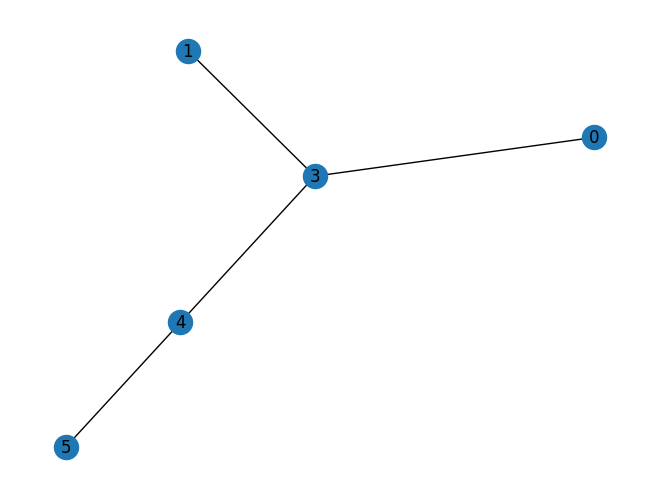

In [112]:
nx.draw(G1.subgraph((0, 1, 3, 4, 5)), with_labels=True)

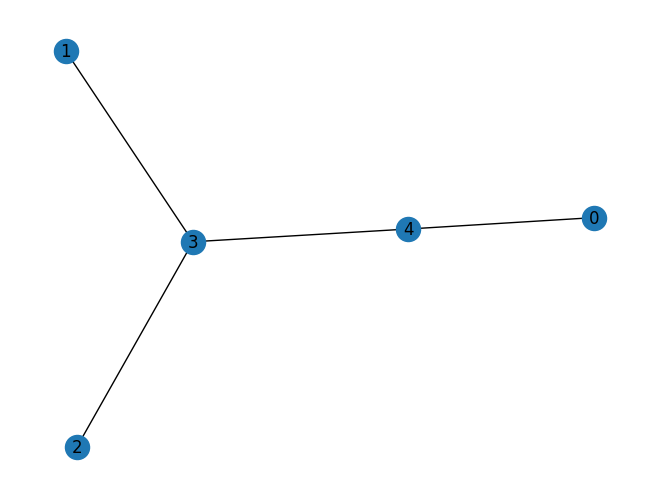

In [113]:
nx.draw(four_node_graphs[1], with_labels=True)